In [109]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from operator import itemgetter
from numpy.random import default_rng

p = 50
f = 10
sf = 5
r = 5

# p = int(input("Number of demand points:"))
# f = int(input("Number of candidate sites:"))
# sf = int(input("Number of selected candidate sites:"))
# r = int(input("Radius to cover:"))

In [110]:
title = "p = " + str(p) + " f = " + str(f) + " sf = " + str(sf) + " r  =" + str(r)

def showInitialPlot(d_points, cs_points):
    fig = plt.figure(figsize=(10,10))
    plt.title(title)
    plt.suptitle('Random Generated Demand and Candidate Points')
    if p >= 100:
        ms = 1
    else:
        ms = 20
    plt.scatter([i[0] for i in d_points], [i[1] for i in d_points], c='black', s=ms)
    plt.scatter([i[0] for i in cs_points], [i[1] for i in cs_points], c='red', s=ms + 15)
    plt.savefig("firstg.jpg")
    plt.show()


def addCirclesToPlot(d_points, cs_points, selected_points, of):
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.title(title)
    plt.suptitle('Random Generated Demand and Candidate Points')
    if p >= 100:
        ms = 1
    else:
        ms = 20
    plt.scatter([i[0] for i in d_points], [i[1] for i in d_points], c='black', s=ms)
    plt.scatter([i[0] for i in cs_points], [i[1] for i in cs_points], c='red', s=ms + 15)
    for point in selected_points:
        circle = plt.Circle((point[0], point[1]), r, color='blue', fill=False)
        ax.add_patch(circle)
    plt.xlabel('Objective Function: ' + str(of))
    plt.savefig("secondg.jpg")
    plt.show()

In [111]:
# Generate Demand points
dx_points = default_rng().choice(p, size=(p - f), replace=False)
dy_points = default_rng().choice(p, size=(p - f), replace=False)

# Generate candidate sites
csx_points = default_rng().choice(p, size=(f), replace=False)
csy_points = default_rng().choice(p, size=(f), replace=False)

demand_points = []
candidate_sites = []

for x in range(p - f):
    demand_points.append([dx_points[x], dy_points[x]])

for x in range(f):
    candidate_sites.append([csx_points[x], csy_points[x]])

print(demand_points)
print(candidate_sites)

d_points_toPlot = list(demand_points)
c_points_toPlot = list(candidate_sites)

[[12, 35], [16, 33], [2, 47], [37, 27], [32, 18], [26, 42], [31, 21], [27, 13], [38, 31], [35, 0], [41, 34], [18, 11], [6, 14], [22, 49], [11, 30], [25, 3], [5, 2], [42, 24], [7, 23], [24, 4], [23, 15], [48, 7], [10, 25], [28, 38], [3, 26], [30, 10], [8, 8], [4, 28], [46, 22], [21, 44], [36, 46], [20, 17], [14, 9], [39, 20], [9, 12], [15, 40], [44, 19], [40, 16], [43, 37], [19, 5]]
[[29, 0], [43, 24], [23, 8], [41, 1], [28, 48], [49, 41], [24, 38], [10, 28], [37, 19], [6, 13]]


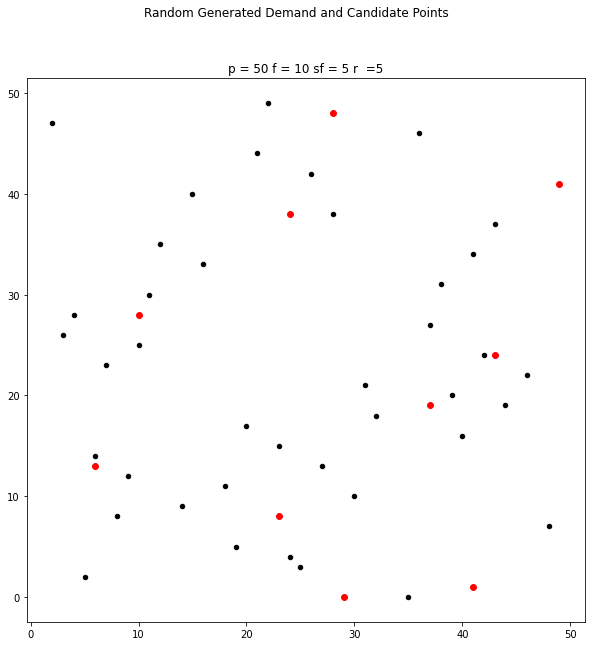

Points in range of candidate sites: [[[29, 0], [25, 3]], [[43, 24], [42, 24]], [[43, 24], [46, 22]], [[23, 8], [24, 4]], [[23, 8], [19, 5]], [[24, 38], [26, 42]], [[24, 38], [28, 38]], [[10, 28], [11, 30]], [[10, 28], [10, 25]], [[37, 19], [39, 20]], [[37, 19], [40, 16]], [[6, 13], [6, 14]], [[6, 13], [9, 12]]]
Candidate sites with more points covered: [43, 24] sites covered: 2
New demand points: [[12, 35], [16, 33], [2, 47], [37, 27], [32, 18], [26, 42], [31, 21], [27, 13], [38, 31], [35, 0], [41, 34], [18, 11], [6, 14], [22, 49], [11, 30], [25, 3], [5, 2], [7, 23], [24, 4], [23, 15], [48, 7], [10, 25], [28, 38], [3, 26], [30, 10], [8, 8], [4, 28], [21, 44], [36, 46], [20, 17], [14, 9], [39, 20], [9, 12], [15, 40], [44, 19], [40, 16], [43, 37], [19, 5]]
New candidate sites: [[29, 0], [23, 8], [41, 1], [28, 48], [49, 41], [24, 38], [10, 28], [37, 19], [6, 13]]
---------------------------------------------------------------
Points in range of candidate sites: [[[29, 0], [25, 3]], [[23, 

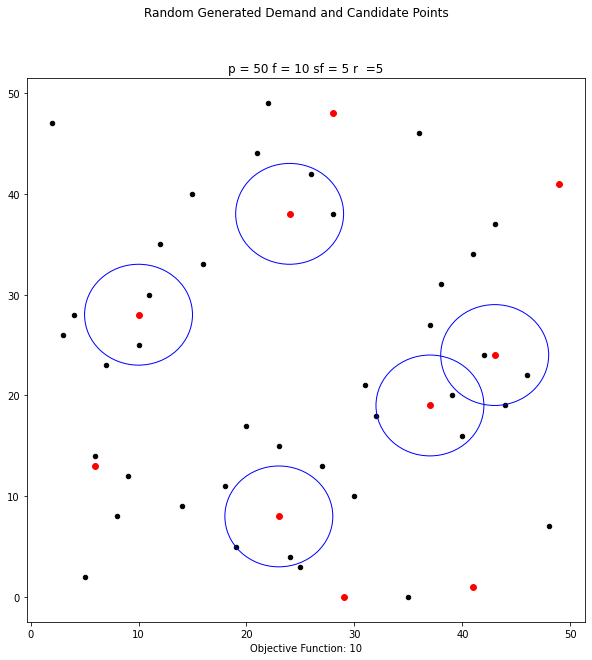

Covered points: [[26, 42], [11, 30], [42, 24], [24, 4], [10, 25], [28, 38], [46, 22], [39, 20], [40, 16], [19, 5]]
Not covered points: [[12, 35], [16, 33], [2, 47], [37, 27], [32, 18], [31, 21], [27, 13], [38, 31], [35, 0], [41, 34], [18, 11], [6, 14], [22, 49], [25, 3], [5, 2], [7, 23], [23, 15], [48, 7], [3, 26], [30, 10], [8, 8], [4, 28], [21, 44], [36, 46], [20, 17], [14, 9], [9, 12], [15, 40], [44, 19], [43, 37]]


In [112]:
in_range = []
selected_toPlot = []
count_to_return = []

def get_Distances():
    for candidate in candidate_sites:
        for demand in demand_points:
            d = sqrt((demand[0] - candidate[0]) ** 2 + (candidate[1] - demand[1]) ** 2)
            # print("Distance between", candidate, "and", demand, "is:", d)
            if d <= r:
                in_range.append([candidate, demand])

def count_covered():
    if len(in_range) == 0 or None:
        pass
    else:
        selected_candidate = []
        prev_max = 0
        for candidate in candidate_sites:
            count = [i[0] for i in in_range].count(candidate)
            if count > prev_max:
                prev_max = count
                selected_candidate.clear()
                selected_candidate.append(candidate)
        return selected_candidate, count

def remove_demand(candidate_tr):
    if len(candidate_tr) == 0 or None:
        pass
    else:
        to_remove = []
        for point in in_range:
            if point[0] == candidate_tr:
                to_remove.append(point[1])
        for removing in to_remove:
            demand_points.remove(removing)
        candidate_sites.remove(candidate_tr)


showInitialPlot(d_points_toPlot, c_points_toPlot)
for x in range(sf):
    get_Distances()
    print("Points in range of candidate sites:", in_range)
    candidate_toUse = count_covered()[0][0]
    count_toUse = count_covered()[1]
    Plot_coordinates = count_covered()[0][0]
    print("Candidate sites with more points covered:", candidate_toUse, "sites covered:", count_toUse)
    count_to_return.append([candidate_toUse, count_toUse])
    selected_toPlot.append(Plot_coordinates)
    remove_demand(candidate_toUse)
    print("New demand points:", demand_points)
    print("New candidate sites:", candidate_sites)
    in_range.clear()
    print("---------------------------------------------------------------")
of = len(d_points_toPlot)-len(demand_points)
addCirclesToPlot(d_points_toPlot, c_points_toPlot, selected_toPlot, of)
covered_points = [item for item in d_points_toPlot if item not in demand_points]
print("Covered points:", covered_points)
print("Not covered points:", demand_points)
